In [ ]:
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
"""
Parametros de la DBB2
𝜆: densidad lineal de carga
𝑥: distancia de punto P al conductor
𝜀0: permitividad eléctrica del vacío
Formula -> 𝐸 =  𝜆/(2𝜋*Esub0*x)
"""
#MODELO TEORICO
PI = math.pi
permitividadElectrica = 8.85e-12
densidadLinealCarga = 30.0e-9
def calcular_E_Teorico(x):
  return (densidadLinealCarga/(2*PI*permitividadElectrica*x))
#MODELO CON METODO NUMERICO
#Me demore;) por culpa de esto
"""
A partir del metodo de integracion propuesto, se usa el metodo del trapecio
E = sumatoria de i= 0 hasta un ymax(2*k*𝜆*Δy/(yi^2 + x^2)^(3/2)
k: constante de Coulomb
𝜆: densidad lineal de carga
Δy:incremento en el valor de y
x: distancia de punto P al conductor
ymax: y maximo de la funcion
yi:valor de y en el i-ésimo paso o término de una sumatoria
yi -> yi-1  + Δy , excepto cuando y0 en ese caso y0 = 0
"""
constanteCoulomb = 9e9
def cantidad_decimales(valor):
    str_valor = f"{valor:.15f}".rstrip('0')
    if '.' in str_valor:
        decimales = len(str_valor.split('.')[1])
    else:
        decimales = 0
    return decimales

def calcular_E_MetodoNumerico(x,yMax,incrementoY):
  indice = 0.0
  E_MetNumerico = 0.0
  decimales = cantidad_decimales(incrementoY)
  yi = 0.0
  while indice <= yMax:
      if indice == 0.0:
        E_Temp = (2*constanteCoulomb* densidadLinealCarga*x* incrementoY)/(((yi)**2 + x**2)**(3/2))
        E_MetNumerico += E_Temp
      else:
        yi = yi + incrementoY
        E_Temp = (2*constanteCoulomb* densidadLinealCarga*x* incrementoY)/(((yi)**2 + x**2)**(3/2))
        E_MetNumerico += E_Temp
      indice +=incrementoY
      indice = round(indice,decimales)
  return E_MetNumerico

x = [i for i in range(2,81)]
E_Teorico = [calcular_E_Teorico(num) for num in x]
E_MetodoNumerico = [calcular_E_MetodoNumerico(x=num, yMax=100, incrementoY=0.001) for num in x]
#FUNCION PARA QUE LOS VALORES EN LOS EJES TENGAN SUS RESPECTIVAS CIFRAS SIGNIFICATIVAS
def formato_tres_cifras(val, pos):
    if val == 0:
        return "0,00"
    cifras_enteras = len(str(int(val)))
    if cifras_enteras >= 3:
        texto = f"{val:.0f}"
    else:
        decimales = 3 - cifras_enteras
        texto = f"{val:.{decimales}f}"
    texto = texto.replace(".", ",")
    return texto
#EJE X -> VALORES DEL 2 AL 80
ticks = list(range(10, 81, 10))
ticks.append(2)

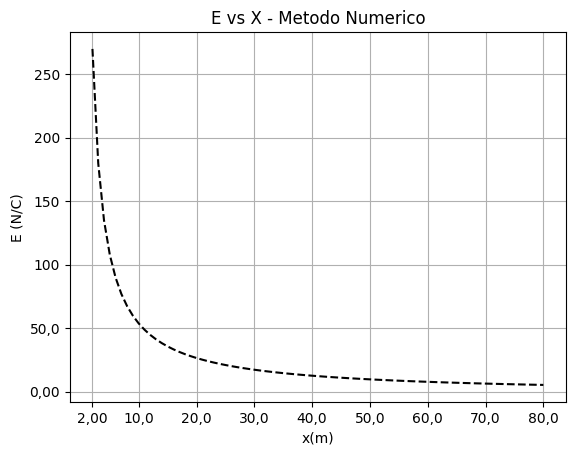

In [ ]:
#GRAFICO E vs X MEDIANTE EL METODO NUMERICO
plt.plot(x,E_MetodoNumerico,color="black", linestyle = "--")
plt.xticks(ticks)
plt.gca().xaxis.set_major_formatter(formato_tres_cifras)
plt.gca().yaxis.set_major_formatter(formato_tres_cifras)
plt.title("E vs X - Metodo Numerico")
plt.xlabel("x(m)")
plt.ylabel("E (N/C)")
plt.grid()

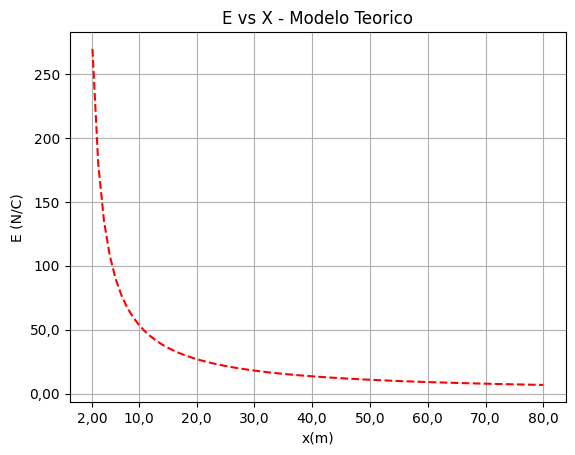

In [ ]:
#GRAFICO E vs X MEDIANTE EL MODELO TEORICO
plt.plot(x,E_Teorico,color="red", linestyle = "--")
plt.xticks(ticks)
plt.gca().xaxis.set_major_formatter(formato_tres_cifras)
plt.gca().yaxis.set_major_formatter(formato_tres_cifras)
plt.title("E vs X - Modelo Teorico")
plt.xlabel("x(m)")
plt.ylabel("E (N/C)")
plt.grid()

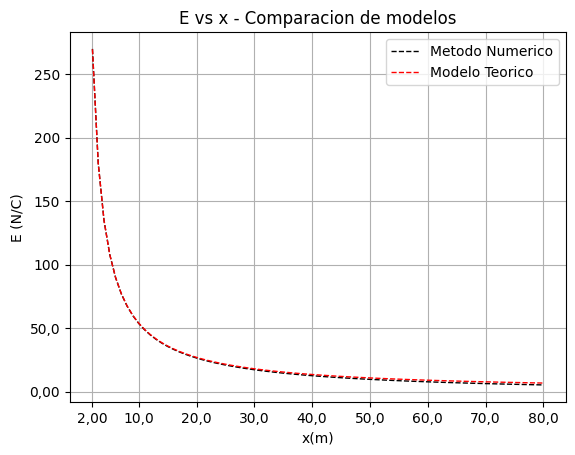

In [ ]:
#GRAFICO E vs X MEDIANTE EL CALCULO NUMERICO Y EL MODELO TEORICO
plt.plot(x,E_MetodoNumerico,color="black", linestyle = "--",linewidth = 1, label = "Metodo Numerico")
plt.plot(x,E_Teorico,color="red", linestyle = "--",linewidth = 1, label = "Modelo Teorico")
plt.legend()
plt.xticks(ticks)
plt.gca().xaxis.set_major_formatter(formato_tres_cifras)
plt.gca().yaxis.set_major_formatter(formato_tres_cifras)
plt.title("E vs x - Comparacion de modelos")
plt.xlabel("x(m)")
plt.ylabel("E (N/C)")
plt.grid()


In [ ]:
def formato_tres_cifras(val, pos):
    if val == 0:
        return "0,00"
    cifras_enteras = len(str(int(val)))
    if cifras_enteras >= 3:
        texto = f"{val:.0f}"
    else:
        decimales = 3 - cifras_enteras
        texto = f"{val:.{decimales}f}"
    texto = texto.replace(".", ",")
    return texto

val = 0.4
cifras_enteras = len(str(int(val)))
print(int(cifras_enteras))
if cifras_enteras >= 3:
      texto = f"{val:.0f}"
else:
      decimales = 3 - cifras_enteras
      texto = f"{val:.{decimales}f}"
texto = texto.replace(".", ",")
print(texto)

1
0,40


In [ ]:
def formato_tres_cifras(val, pos):
    if val == 0:
        return "0,00"
    cifras_enteras = len(str(int(val)))
    if cifras_enteras >= 3:
        texto = f"{val:.0f}"
    else:
        decimales = 3 - cifras_enteras
        texto = f"{val:.{decimales}f}"
    texto = texto.replace(".", ",")
    return texto

#print(formato_tres_cifras(0.2,3))
val1 = 0.2
val2 = 3
val3 = 0.23
val4 = 0.244
val5 = 1.2
val6 = 1.23
val7 = 0.234399
lista1 = [val1,val2,val3,val4,val5,val6,val7]
#caso x >= 0
val11 = -0.2
val22 = -3
val33 = -0.23
val44 = -0.244
val55 = -1.2
val66 = -1.23
val77 = -0.234399
lista2 = [val11,val22,val33,val44,val55,val66,val77]
#caso x <0

def formato_tres_cifras_significativas(valor,pos):
  texto = str(valor)
  texto = texto.split(".")
  print(texto)
  if texto[0] == '0' and len(texto) == 1:
    return "0,00"
  if(texto[0].find('-') == 0):
    texto[0] = texto[0].replace("-","")
    if(texto[0] == '0'):
      word = f"{valor:.3f}"
      word.replace(".",",")
      return word
    else:
      parteZ = len(texto[0])
      if(parteZ == 1):
        word = f"{valor:.2f}"
        word.replace(".",",")
        return word
  else:
    if(texto[0] == '0'):
      word = f"{valor:.3f}"
      word.replace(".",",")
      return word
    else:
      parteZ = len(texto[0])
      if(parteZ == 1):
        word = f"{valor:.2f}"
        word = word.replace(".",",")
        return word

print(formato_tres_cifras_significativas(0.2,1))

['0', '2']
0.200
